In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'bac' # ticker symbol
train = 1 # 1 for train, 0 for pass
days_ahead = 1 # for predicting 1 day ahead
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# aapl start date: 12/12/1980, trained 12/23/20
# tsla start date: 06/29/2010, trained 12/23/20
# vbiv start date: 09/04/2002, trained 12/23/20
# vgt start date: 01/26/2004, trained 12/23/20
# idex start date: 05/23/2007, trained 12/23/20
# iyw start date: 05/15/2000, trained 12/23/20
# 
start_dates = {'aapl':'12/12/1980'
               , 'acy': '01/18/1998'
               , 'amd': '03/17/1980'
               , 'baba': '09/15/2014'
               , 'bac': '02/19/1973'
               , 'crm': '06/23/2004'
               , 'esgv': '09/16/2018'
               , 'goog': '08/16/2004'
               , 'ibm': '01/02/1962'
               , 'idex': '05/23/2007'
               , 'intc': '03/16/1980'
               , 'iyw': '05/15/2000'
               , 'msft': '03/10/1986'
               , 'nio': '09/10/2018'
               , 'nvda': '01/22/1999'
               , 'pypl': '07/05/2015'
               , 'tsla': '06/29/2010'
               , 'vbiv': '09/04/2002'
               , 'vgt': '01/26/2004'
              }
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)

In [4]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-16,28.820000,28.440001,28.799999,28.719999,42463200.0,28.719999,0.002778,0.013361,0.002793,0.014476,-0.000472,1
2020-12-17,28.920000,28.530001,28.709999,28.830000,43182700.0,28.830000,-0.004180,0.013670,0.003830,0.013425,-0.001859,-1
2020-12-18,29.100000,28.570000,28.889999,28.670000,82817200.0,28.670000,0.007615,0.018551,-0.005550,0.010273,0.000741,1
2020-12-21,29.990000,28.730000,29.100000,29.740000,93397400.0,29.740000,-0.021993,0.043857,0.037321,0.016583,0.010656,-1
2020-12-22,29.780001,29.170000,29.780001,29.209999,39054300.0,29.209999,0.019140,0.020912,-0.017821,0.020488,0.004115,1
2020-12-23,30.350000,29.330000,29.389999,30.049999,52537200.0,30.049999,-0.022457,0.034777,0.028757,0.023183,0.009308,-1
2020-12-24,30.270000,29.740000,30.270000,29.959999,22632300.0,29.959999,0.010241,0.017821,-0.002995,0.023779,0.007943,1
2020-12-28,30.549999,29.990000,30.230000,30.129999,32861200.0,30.129999,0.003308,0.018673,0.005674,0.022692,0.010187,-1
2020-12-29,30.250000,29.930000,30.170000,30.010000,33291900.0,30.010000,0.005303,0.010692,-0.003983,0.017198,0.001927,1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

/home/david/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.65713788 0.65713788 0.65713788]
  warnings.warn(


In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

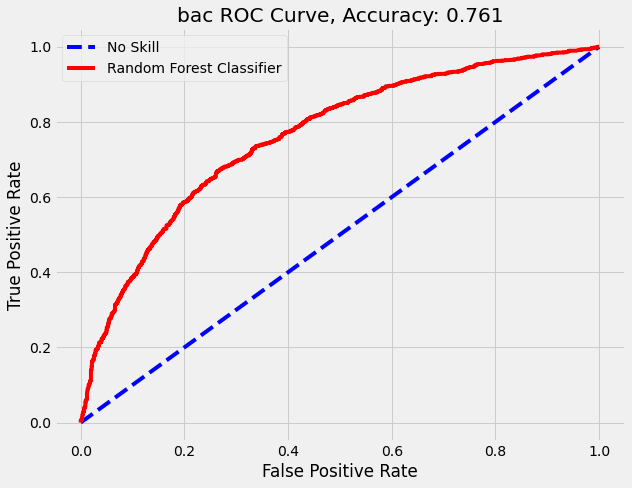

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

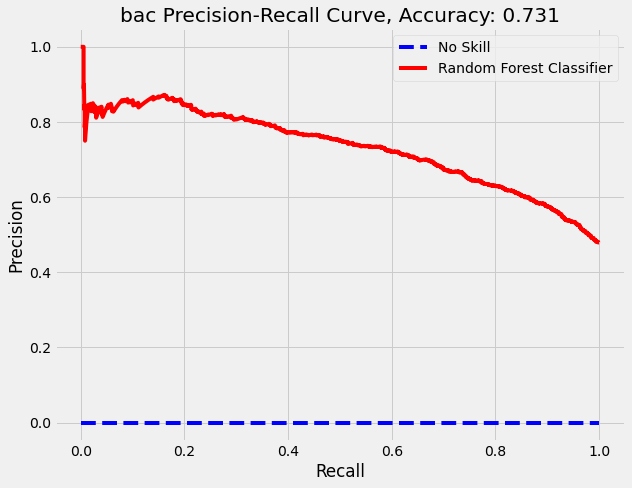

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

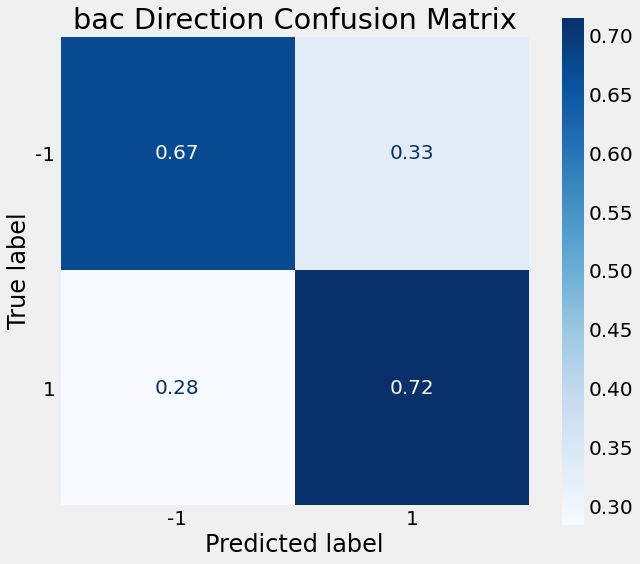

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6626697215545044'

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          3.022000e+01
Low           2.994000e+01
Open          3.000000e+01
Close         2.998000e+01
Volume        2.633420e+07
Adj Close     2.998000e+01
oc            6.666819e-04
hl            9.351996e-03
adj          -9.996897e-04
5stdev_adj    1.364776e-02
5sma_adj      5.290821e-03
direction    -1.000000e+00
Name: 2020-12-30 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc            0.000667
hl            0.009352
5stdev_adj    0.013648
5sma_adj      0.005291
Name: 2020-12-30 00:00:00, dtype: float64

### Prediction...

In [13]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold bac


In [14]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [15]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-23,30.350000,29.330000,29.389999,30.049999,52537200.0,30.049999,-0.022457,0.034777,0.028757,0.023183,0.009308,-1,-1,0.002995
2020-12-24,30.270000,29.740000,30.270000,29.959999,22632300.0,29.959999,0.010241,0.017821,-0.002995,0.023779,0.007943,1,1,0.005674
2020-12-28,30.549999,29.990000,30.230000,30.129999,32861200.0,30.129999,0.003308,0.018673,0.005674,0.022692,0.010187,-1,1,-0.003983
2020-12-29,30.250000,29.930000,30.170000,30.010000,33291900.0,30.010000,0.005303,0.010692,-0.003983,0.017198,0.001927,1,1,-0.001000
2020-12-30,30.219999,29.940001,30.000000,29.980000,26334200.0,29.980000,0.000667,0.009352,-0.001000,0.013648,0.005291,-1,-1,-0.000000


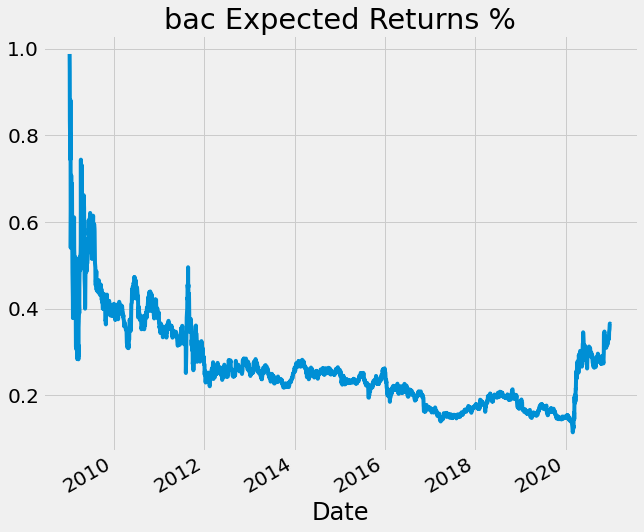

In [16]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [17]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

1.62283521720895

In [18]:
# multiple times original investment, not bad but...

In [19]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) /stock_df['Close'][-test_idx]

5.616275761045259

In [20]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/